**OUTLIER: An Outlier is a data point in a dataset that is distant from all other observations.**
**A data point that lies outside the overall distribution of the dataset.**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import zscore

In [5]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,15,90])
data=np.concatenate([data,outliers])

In [7]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


**Using Scatter Plot**

**<ins>A Scatter plot helps visually identify extreme values.</ins>**

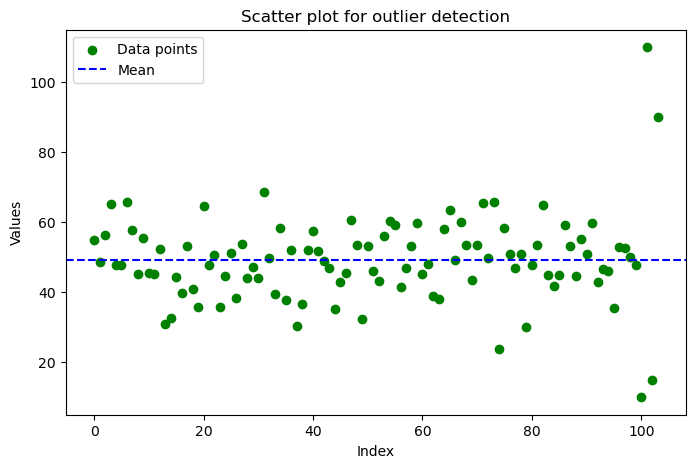

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='green',label='Data points')
plt.axhline(y=df['Values'].mean(),color='blue',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title("Scatter plot for outlier detection")
plt.legend()
plt.show()

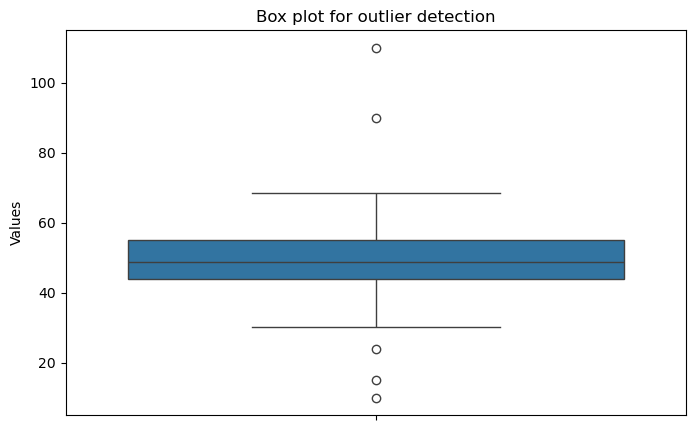

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box plot for outlier detection")
plt.show()

**<ins>Z-score method</ins>**

**The zscore formula is: z = (x-μ)/σ**

**where:**

*x= Data point*

*μ= Mean of the dataset*

*σ= Standard deviation of the datset*

**Steps:**

*1.Compute the Z-score for each data point.*

*2.If  Z-score > 3 or Z-score < -3, Then mark it as an outlier*

In [54]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x: 'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
100    10.0 -3.140481   Outlier
101   110.0  4.862404   Outlier
103    90.0  3.261827   Outlier


**Interquartile Method**

  IQR = Q3 - Q1

**Steps**

1. Calculate Q1 (25th percentile) and Q3(75th percentile)

2. Compute IQR = Q3 - Q1

3. Define lower  & upper bounds:

    **Lower Bound = Q1 - 1.5 x IQR**
   
    **Upper Bound = Q3 + 1.5 x IQR**

5. Any Value outside these bounds is an outlier

In [61]:
Q1= df['Values'].quantile(0.25)
Q3= df['Values'].quantile(0.75)
IQR= Q3 - Q1
Lower_Bound = Q1 - 1.5*IQR
Upper_Bound = Q3 + 1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x: 'Outlier' if (x<Lower_Bound or x>Upper_Bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -2.035879    Normal     Outlier
100   10.000000 -3.140481   Outlier     Outlier
101  110.000000  4.862404   Outlier     Outlier
102   15.000000 -2.740337    Normal     Outlier
103   90.000000  3.261827   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**
    
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

**The Interquartile Range (IQR) is calculated as:**
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [85]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,15,120])
data=np.concatenate([data,outliers])

Q1 = np.percentile(data,25)
Q2 = np.median(data)
Q3 = np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=data[(data<lower_bound) | (data>upper_bound)]

print(f"5-Number Summary:\nMin: {min_value}, Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")

5-Number Summary:
Min: 10.0, Q1: 43.874401021766715, Median (Q2): 48.73043708220287, Q3: 55.00852473036764, Max: 120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.          15.         120.        ]
